# Default payment prediction 📊🪪💳💰
- Done by: Lujain Yousef

# Reading the data

In [1]:
import pandas as pd 
df = pd.read_csv('credit-card-full.csv',index_col='ID')
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


# Cols Desc:
- `ID`: Unique identifier for each credit card client.
- `LIMIT_BAL:` Credit limit, indicating the maximum amount of money the client can borrow.
- `SEX:` Gender of the client (1 = male, 2 = female).
- `EDUCATION:` Level of education (1 = graduate school, 2 = university, 3 = high school, 4 = others).
- `MARRIAGE:` Marital status (1 = married, 2 = single, 3 = others).
- `AGE:` Age of the client in years.
- `PAY_0, PAY_2, PAY_3, PAY_4`: Repayment status in the past few months. These columns likely represent the repayment status in previous months, with "PAY_0" representing the most recent month, and "PAY_4" representing the repayment status four months ago.
- `BILL_AMT1, BILL_AMT2, BILL_AMT3, BILL_AMT4, BILL_AMT5, BILL_AMT6`: Amount of bill statement in the past few months. Similar to the repayment status columns, these likely represent the bill amount for the respective months.
- `PAY_AMT1, PAY_AMT2, PAY_AMT3, PAY_AMT4, PAY_AMT5, PAY_AMT6:` Amount of previous payment in the past few months.
- `default payment next month:` This is likely the target variable indicating whether the client defaulted on their payment in the next month (1 = yes, 0 = no).- 

# Data preprocessing 

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   30000 non-null  int64
 1   SEX                         30000 non-null  int64
 2   EDUCATION                   30000 non-null  int64
 3   MARRIAGE                    30000 non-null  int64
 4   AGE                         30000 non-null  int64
 5   PAY_0                       30000 non-null  int64
 6   PAY_2                       30000 non-null  int64
 7   PAY_3                       30000 non-null  int64
 8   PAY_4                       30000 non-null  int64
 9   PAY_5                       30000 non-null  int64
 10  PAY_6                       30000 non-null  int64
 11  BILL_AMT1                   30000 non-null  int64
 12  BILL_AMT2                   30000 non-null  int64
 13  BILL_AMT3                   30000 non-null  int64
 14  BILL_AMT4  

In [3]:
df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [4]:
df.dtypes

LIMIT_BAL                     int64
SEX                           int64
EDUCATION                     int64
MARRIAGE                      int64
AGE                           int64
PAY_0                         int64
PAY_2                         int64
PAY_3                         int64
PAY_4                         int64
PAY_5                         int64
PAY_6                         int64
BILL_AMT1                     int64
BILL_AMT2                     int64
BILL_AMT3                     int64
BILL_AMT4                     int64
BILL_AMT5                     int64
BILL_AMT6                     int64
PAY_AMT1                      int64
PAY_AMT2                      int64
PAY_AMT3                      int64
PAY_AMT4                      int64
PAY_AMT5                      int64
PAY_AMT6                      int64
default payment next month    int64
dtype: object

In [6]:
import numpy as np
corr_df = df.corr().abs()
mask = np.triu(np.ones_like(corr_df,dtype=bool))
tri_df = corr_df.mask(mask)
tri_df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
LIMIT_BAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SEX,0.024755,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EDUCATION,0.219161,0.014232,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MARRIAGE,0.108139,0.031389,0.143464,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AGE,0.144713,0.090874,0.175061,0.414170,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PAY_0,0.271214,0.057643,0.105364,0.019917,0.039447,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PAY_2,0.296382,0.070771,0.121566,0.024199,0.050148,0.672164,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PAY_3,0.286123,0.066096,0.114025,0.032688,0.053048,0.574245,0.766552,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PAY_4,0.267460,0.060173,0.108793,0.033122,0.049722,0.538841,0.662067,0.777359,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PAY_5,0.249411,0.055064,0.097520,0.035629,0.053826,0.509426,0.622780,0.686775,0.819835,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
to_drop = [c for c in tri_df.columns if any(tri_df[c]>0.8)] # threshold 0.8
print(to_drop)
df = df.drop(to_drop,axis=1)
df.shape


['PAY_4', 'PAY_5', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5']


(30000, 17)

# Set the dependent & independent variables

In [8]:
X = df.drop('default payment next month',axis=1)
y = df['default payment next month']

# Model Selection

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

# Apply classification - logistic reg

In [10]:
from sklearn.linear_model import LogisticRegression 
l = LogisticRegression()
l.fit(X_train,y_train)

C:\Users\yluja\Documents\adult.csv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# check data coefs

In [11]:
original_variables = list(X_train.columns)
coeffiecients = l.coef_[0]
coefs_df = pd.DataFrame({'original variables':original_variables,'coffiecents':coeffiecients})
coefs_df

,original variables,coffiecents
0,LIMIT_BAL,-0.000003
1,SEX,-0.000869
2,EDUCATION,-0.001100
3,MARRIAGE,-0.000934
4,AGE,-0.015873
5,PAY_0,0.001133
6,PAY_2,0.000861
7,PAY_3,0.000804
8,PAY_6,0.000687
9,BILL_AMT6,0.000004


In [12]:
coefs_df.sort_values(by='coffiecents',axis=0,ascending=False)

,original variables,coffiecents
5,PAY_0,0.001133
6,PAY_2,0.000861
7,PAY_3,0.000804
8,PAY_6,0.000687
9,BILL_AMT6,0.000004
0,LIMIT_BAL,-0.000003
15,PAY_AMT6,-0.000004
14,PAY_AMT5,-0.000009
12,PAY_AMT3,-0.000009
11,PAY_AMT2,-0.000015


In [13]:
# Remove to the col with the least coef
X.drop('LIMIT_BAL',axis=1,inplace=True)

# KNN - picking the best k-neighbor hyperparameter

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
neighbors_list = [3,5,10,20,50,75]
acc_list = []
for test_number in neighbors_list:
    model = KNeighborsClassifier(n_neighbors=test_number)
    predictions =  model.fit(X_train,y_train).predict(X_test)
    acc = accuracy_score(y_test,predictions)
    acc_list.append(acc)

In [58]:
result_df = pd.DataFrame({'neighbors_list':neighbors_list,'acc':acc_list})

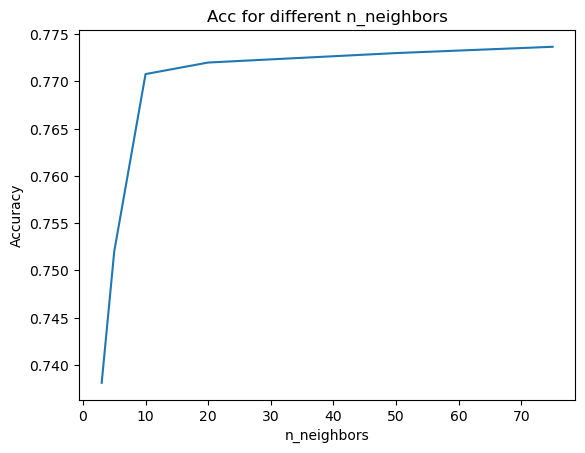

In [59]:
import matplotlib.pyplot as plt
# we used lots of values so we will use graph intead of table 
plt.plot(result_df['neighbors_list'],result_df['acc'])
# add the labels and title 
plt.gca().set(xlabel='n_neighbors',ylabel='Accuracy',title='Acc for different n_neighbors')
plt.show()

In [61]:
model = KNeighborsClassifier(n_neighbors=20)
predictions =  model.fit(X_train,y_train).predict(X_test)
acc = accuracy_score(y_test,predictions)
acc

0.772

# GradientBoosting - GridSearch

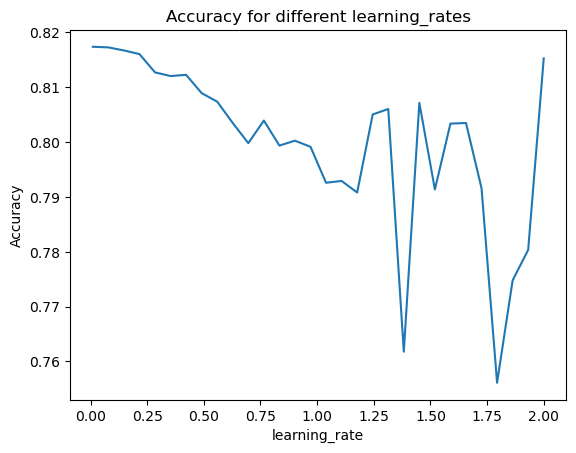

In [67]:
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
# Set the learning rates & accuracies list
learn_rates = np.linspace(0.01, 2, num=30)
accuracies = []

# Create the for loop
for learn_rate in learn_rates:
  	# Create the model, predictions & save the accuracies as before
    model = GradientBoostingClassifier(learning_rate=learn_rate)
    predictions = model.fit(X_train, y_train).predict(X_test)
    accuracies.append(accuracy_score(y_test, predictions))

# Plot results    
plt.plot(learn_rates, accuracies)
plt.gca().set(xlabel='learning_rate', ylabel='Accuracy', title='Accuracy for different learning_rates')
plt.show()

In [71]:
model = GradientBoostingClassifier(learning_rate=0.01)
predictions = model.fit(X_train, y_train).predict(X_test)
accuracy_score(y_test, predictions)

0.8173333333333334

# Random Forest - Grid search cv 

In [16]:
from sklearn.ensemble import RandomForestClassifier
# Create a Random Forest Classifier with specified criterion
rf = RandomForestClassifier(criterion='entropy')

# Create the parameter grid
param_grid = {'max_depth': [2, 4, 8, 15], 'min_samples_leaf': [1,2,4,6]}


In [17]:
from sklearn.model_selection import GridSearchCV
grid_rf = GridSearchCV(
        estimator = rf,
        param_grid = param_grid,
        scoring = 'accuracy',
        n_jobs = 4,
        refit=True,
        cv =10, #5 or 10
        return_train_score=True)

In [18]:
grid_rf.fit(X_train,y_train)
pred = grid_rf.predict(X_test)
accuracy_score(y_test,pred)

0.8193333333333334

In [21]:
print('best parameters:{} & best Score {}'.format(grid_rf.best_params_, grid_rf.best_score_))

best parameters:{'max_depth': 8, 'min_samples_leaf': 6} & best Score 0.8209523809523811
